In [66]:
!pip install pydotplus

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [67]:
!pip install graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [74]:
!pip install dtreeviz

  Stored in directory: C:\Users\h\AppData\Local\pip\Cache\wheels\3b\50\6b\c9e82550ad7ab31b18a974df0683385eb20dd4e922fe316048
Successfully built dtreeviz


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from dtreeviz.trees import *
from matplotlib.pylab import rcParams
from xgboost import plot_tree
from sklearn.metrics import confusion_matrix

# 한글 폰트 세팅

In [232]:
df89 = pd.read_csv("df_cl_17.csv")

In [233]:
df89.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,1,0,1,1,5,5,1,0,0,...,0,0,0,0,7,13,1,3,1,1
1,2-1,1,4,1,3,6,2,1,0,0,...,0,0,0,0,3,2,1,5,2,1
2,3-1,6,0,1,8,2,3,1,0,0,...,0,0,0,0,3,2,2,2,3,2
3,4-1,2,0,1,2,11,1,1,0,0,...,0,0,0,0,13,2,2,2,4,1
4,5-1,3,2,1,1,6,3,1,0,0,...,0,0,0,0,4,2,2,3,5,2


In [234]:
df89 = df89.rename(columns = {'Unnamed: 0': 'newID'})

In [235]:
X_train = df89.drop(['newID','cluster'], axis = 1)
y_train = df89['cluster']

In [236]:
pd.DataFrame(y_train)['cluster'].value_counts()

3    3930
2    3488
1    1934
5    1494
4    1120
6     783
7     688
Name: cluster, dtype: int64

In [237]:
y_train

0        1
1        1
2        2
3        1
4        2
5        1
6        2
7        2
8        3
9        4
10       2
11       2
12       3
13       1
14       3
15       2
16       4
17       4
18       4
19       1
20       1
21       2
22       1
23       3
24       2
25       2
26       1
27       2
28       2
29       3
        ..
13407    3
13408    6
13409    1
13410    4
13411    2
13412    3
13413    1
13414    2
13415    3
13416    3
13417    1
13418    2
13419    3
13420    3
13421    4
13422    2
13423    4
13424    4
13425    2
13426    1
13427    4
13428    5
13429    5
13430    5
13431    5
13432    5
13433    5
13434    5
13435    5
13436    5
Name: cluster, Length: 13437, dtype: int64

In [238]:
X_train.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,1,3,1
1,1,4,1,3,6,2,1,0,0,0,...,0,0,0,0,0,3,2,1,5,2
2,6,0,1,8,2,3,1,0,0,0,...,0,0,0,0,0,3,2,2,2,3
3,2,0,1,2,11,1,1,0,0,0,...,0,0,0,0,0,13,2,2,2,4
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,2,3,5


In [239]:
X_train.shape

(13437, 28)

In [171]:
X_train.columns

Index(['Q1', 'Q2_1', 'Q5_1', 'Q5_2A1', 'Q6_1A1', 'Q6_3A1', 'Q10_1A1',
       'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6', 'Q10_1A7',
       'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12', 'Q10_1A13',
       'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q10_3A1', 'D_COU',
       'D_GEN', 'D_AGE', 'D_MON'],
      dtype='object')

In [240]:
X_train['D_GEN'] = X_train['D_GEN'].replace(1,0)
X_train['D_GEN'] = X_train['D_GEN'].replace(2,1)

In [211]:
X_train1 = X_train.copy()

#### 방한횟수, 동반자수, 주요 방한 목적, 한국 방문 선택 시 고려 요인, 한국 여행 전 정보 입수 출처, 한국 여행 준비 중 가장 필요했던 정보, 한국 여행 중 방문 지역, 총 숙박기간, 국가, 성별, 나이대, 월별

In [212]:
X_train1.loc[1] = [5,0,2,0,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,9,0,3,1] # 지윤

In [213]:
X_train1.loc[2] = [3,3,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,2,5] # 다정

In [143]:
#X_train1.loc[3] = [1,3,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,2,8] # 지연 5

In [214]:
X_train1.loc[3] = [0,8,1,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,2,1,3,9] # 지연 7

In [215]:
X_train1.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,0,3,1
1,5,0,2,0,6,2,1,0,0,0,...,0,0,0,0,0,11,9,0,3,1
2,3,3,1,2,1,1,1,0,0,0,...,0,0,0,0,0,6,1,1,2,5
3,0,8,1,14,1,1,0,0,0,0,...,0,0,0,1,0,4,2,1,3,9
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,1,3,5


In [217]:
X_train1.iloc[1:4,:]

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
1,5,0,2,0,6,2,1,0,0,0,...,0,0,0,0,0,11,9,0,3,1
2,3,3,1,2,1,1,1,0,0,0,...,0,0,0,0,0,6,1,1,2,5
3,0,8,1,14,1,1,0,0,0,0,...,0,0,0,1,0,4,2,1,3,9


In [218]:
X_train2 = X_train1.iloc[1:4,:]
X_train2.shape

(3, 28)

In [224]:
X_train2_yun = X_train2.drop([2,3],axis=0)

In [225]:
X_train2_yun

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
1,5,0,2,0,6,2,1,0,0,0,...,0,0,0,0,0,11,9,0,3,1


In [226]:
# 지윤 X_train, X_train2 => pd.concat
X_train3_yun = pd.concat([X_train, X_train2_yun], axis = 0)

In [227]:
X_train3_yun.tail(1)

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
1,5,0,2,0,6,2,1,0,0,0,...,0,0,0,0,0,11,9,0,3,1


In [228]:
# 지윤 dummy
dataP_imp1_yun = pd.get_dummies(X_train3_yun,columns=['Q5_1','Q5_2A1','Q6_1A1', 'Q6_3A1', 'D_COU', 'D_AGE', 'D_MON'])

In [229]:
X_yun = dataP_imp1_yun.tail(1)

In [230]:
pred_yun = lgbm.predict(X_yun)

In [231]:
pred_1

array([3], dtype=int64)

In [195]:
# X_train, X_train2 => pd.concat
X_train3 = pd.concat([X_train, X_train2], axis = 0)

In [196]:
X_train3.tail(3)

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
1,5,0,2,0,6,2,1,0,0,0,...,0,0,0,0,0,11,9,0,3,1
2,3,3,1,2,1,1,1,0,0,0,...,0,0,0,0,0,6,1,1,2,5
3,0,8,1,14,1,1,0,0,0,0,...,0,0,0,1,0,4,2,1,3,9


In [197]:
# dummy
dataP_imp1 = pd.get_dummies(X_train3,columns=['Q5_1','Q5_2A1','Q6_1A1', 'Q6_3A1', 'D_COU', 'D_AGE', 'D_MON'])

In [198]:
X = dataP_imp1.tail(3)

In [199]:
X.columns

Index(['Q1', 'Q2_1', 'Q10_1A1', 'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5',
       'Q10_1A6', 'Q10_1A7', 'Q10_1A8',
       ...
       'D_MON_3', 'D_MON_4', 'D_MON_5', 'D_MON_6', 'D_MON_7', 'D_MON_8',
       'D_MON_9', 'D_MON_10', 'D_MON_11', 'D_MON_12'],
      dtype='object', length=105)

In [200]:
X

,Q1,Q2_1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,...,D_MON_3,D_MON_4,D_MON_5,D_MON_6,D_MON_7,D_MON_8,D_MON_9,D_MON_10,D_MON_11,D_MON_12
1,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [201]:
pred = lgbm.predict(X)

In [202]:
pred

array([3, 2, 7], dtype=int64)

In [7]:
pred

array([1, 3, 7], dtype=int64)

In [241]:
dataP_imp = pd.get_dummies(X_train,columns=['Q5_1','Q5_2A1','Q6_1A1', 'Q6_3A1', 'D_COU', 'D_AGE', 'D_MON'])

x_tr, x_ts, y_tr, y_ts = train_test_split(dataP_imp,y_train, test_size=0.3, random_state=0)

In [245]:
dataP_imp.shape

(13437, 105)

In [242]:
x_tr.shape

(9405, 105)

In [243]:
x_ts.shape

(4032, 105)

In [51]:
dataP_imp.columns

Index(['Q1', 'Q2_1', 'Q10_1A1', 'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5',
       'Q10_1A6', 'Q10_1A7', 'Q10_1A8',
       ...
       'D_MON_3', 'D_MON_4', 'D_MON_5', 'D_MON_6', 'D_MON_7', 'D_MON_8',
       'D_MON_9', 'D_MON_10', 'D_MON_11', 'D_MON_12'],
      dtype='object', length=105)

### Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
y_pred_dt = dt.predict(x_ts)

In [23]:
accuracy_score(y_ts, y_pred_dt)

0.8851686507936508

In [24]:
f1_score(y_ts, y_pred_dt, average='macro')

0.8589975557099792

In [25]:
pd.DataFrame(y_pred_dt)[0].value_counts()

3    1129
2     994
1     634
5     469
4     361
6     232
7     213
Name: 0, dtype: int64

In [28]:
confusion_matrix(y_ts, y_pred_dt)

array([[ 521,   48,    1,   18,    9,    4,    3],
       [  60,  887,    4,   35,   19,   26,    8],
       [   2,   11, 1112,    3,    4,    0,    2],
       [  23,   18,    0,  277,   14,   11,    2],
       [  16,   12,    9,   17,  404,    6,   13],
       [   4,   11,    1,    7,    8,  183,    0],
       [   8,    7,    2,    4,   11,    2,  185]], dtype=int64)

#### random_state 고정 x

In [94]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
y_pred_dt1 = dt1.predict(x_ts)

In [96]:
f1_score(y_ts, y_pred_dt1, average='macro')

0.8586781574658386

### Random Forest

In [26]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
y_pred_rf = rf.predict(x_ts)

In [30]:
accuracy_score(y_ts, y_pred_rf)

0.9124503968253969

In [31]:
f1_score(y_ts, y_pred_rf, average='macro')

0.8898978741565262

In [32]:
pd.DataFrame(y_pred_rf)[0].value_counts()

3    1139
2     998
1     598
5     500
4     350
7     226
6     221
Name: 0, dtype: int64

In [33]:
confusion_matrix(y_ts, y_pred_rf)

array([[ 537,   32,    1,   16,    7,    6,    5],
       [  39,  918,    7,   24,   20,   21,   10],
       [   2,    3, 1120,    2,    6,    0,    1],
       [  13,   27,    1,  286,    9,    8,    1],
       [   2,    5,    6,   16,  437,    1,   10],
       [   5,    8,    0,    5,   10,  184,    2],
       [   0,    5,    4,    1,   11,    1,  197]], dtype=int64)

#### random_state 고정 x

In [73]:
rf1 = RandomForestClassifier()
rf1.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_pred_rf1 = rf1.predict(x_ts)

In [75]:
f1_score(y_ts, y_pred_rf1, average='macro')

0.8852518225190869

### Light GBM

In [42]:
from lightgbm import LGBMClassifier

In [43]:
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(x_tr, y_tr)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
y_pred_lgbm = lgbm.predict(x_ts)

In [38]:
accuracy_score(y_ts, y_pred_lgbm)

0.9231150793650794

In [39]:
f1_score(y_ts, y_pred_lgbm, average='macro')

0.9054889763352197

In [40]:
confusion_matrix(y_ts, y_pred_lgbm)

array([[ 538,   28,    0,   16,    9,    7,    6],
       [  37,  914,   10,   34,   17,   19,    8],
       [   1,    5, 1126,    1,    1,    0,    0],
       [   4,   15,    1,  309,   10,    5,    1],
       [   2,    2,    8,    9,  441,    3,   12],
       [   3,    5,    0,    5,    8,  193,    0],
       [   0,    6,    3,    2,    5,    2,  201]], dtype=int64)

#### random_state 고정 x

In [76]:
lgbm1 = LGBMClassifier()
lgbm1.fit(x_tr, y_tr)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [77]:
y_pred_lgbm1 = lgbm1.predict(x_ts)

In [78]:
f1_score(y_ts, y_pred_lgbm1, average='macro')

0.9054889763352197

### Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [42]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(x_tr, y_tr)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [43]:
y_pred_adb = adb.predict(x_ts)

In [44]:
accuracy_score(y_ts, y_pred_adb)

0.8869047619047619

In [45]:
f1_score(y_ts, y_pred_adb, average='macro')

0.8671533482862486

In [46]:
confusion_matrix(y_ts, y_pred_adb)

array([[ 511,   51,    1,   17,    9,    8,    7],
       [  39,  883,   10,   48,   16,   27,   16],
       [   1,   35, 1094,    1,    1,    0,    2],
       [   3,    7,    0,  295,   20,   19,    1],
       [   2,    2,   43,    8,  392,   10,   20],
       [   0,    8,    0,    4,    5,  195,    2],
       [   0,    1,    4,    1,    5,    2,  206]], dtype=int64)

#### random_state 고정 x

In [79]:
adb1 = AdaBoostClassifier()
adb1.fit(x_tr, y_tr)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [80]:
y_pred_adb1 = adb1.predict(x_ts)

In [81]:
f1_score(y_ts, y_pred_adb1, average='macro')

0.8671533482862486

### XGB

In [47]:
xgb = XGBClassifier(random_state=0)
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
y_pred_xgb = xgb.predict(x_ts)

In [49]:
accuracy_score(y_ts, y_pred_xgb)

0.9171626984126984

In [50]:
f1_score(y_ts, y_pred_xgb, average='macro')

0.8966076619711362

In [51]:
confusion_matrix(y_ts, y_pred_xgb)

array([[ 533,   29,    0,   18,    9,    8,    7],
       [  35,  896,    6,   47,   18,   23,   14],
       [   1,    7, 1122,    1,    1,    0,    2],
       [   3,    8,    1,  309,   14,    8,    2],
       [   2,    2,    6,   10,  438,    1,   18],
       [   2,    3,    0,    3,   14,  192,    0],
       [   0,    1,    2,    0,    6,    2,  208]], dtype=int64)

#### random_state 고정 x

In [91]:
xgb1 = XGBClassifier()
xgb1.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [92]:
y_pred_xgb1 = xgb1.predict(x_ts)

In [93]:
f1_score(y_ts, y_pred_xgb1, average='macro')

0.8966076619711362

### Gradient Boosting

In [52]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(x_tr, y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [53]:
y_pred_gbm = gbm.predict(x_ts)

In [54]:
accuracy_score(y_ts, y_pred_gbm)

0.919890873015873

In [55]:
f1_score(y_ts, y_pred_gbm, average='macro')

0.9004806394511992

In [ ]:
f1_score(y_ts, y_pred, average='macro')

In [56]:
confusion_matrix(y_ts, y_pred_gbm)

array([[ 540,   26,    0,   16,    9,    8,    5],
       [  34,  904,    8,   41,   23,   19,   10],
       [   1,    7, 1122,    1,    1,    0,    2],
       [   3,    8,    1,  309,   14,    8,    2],
       [   2,    2,    7,   12,  438,    1,   15],
       [   4,    4,    0,    5,    8,  193,    0],
       [   0,    3,    3,    2,    6,    2,  203]], dtype=int64)

#### random_state 고정 x

In [85]:
gbm1 = GradientBoostingClassifier()
gbm1.fit(x_tr, y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [86]:
y_pred_gbm1 = gbm1.predict(x_ts)

In [87]:
f1_score(y_ts, y_pred_gbm1, average='macro')

0.9001843553319869

### Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression(random_state=0)
log.fit(x_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_pred_log = log.predict(x_ts)

In [60]:
accuracy_score(y_ts, y_pred_log)

0.9124503968253969

In [61]:
f1_score(y_ts, y_pred_log, average='macro')

0.8913673872600437

In [62]:
confusion_matrix(y_ts, y_pred_log)

array([[ 530,   35,    0,   16,    9,    8,    6],
       [  40,  894,    6,   41,   21,   24,   13],
       [   2,    4, 1124,    1,    2,    0,    1],
       [   6,   12,    1,  305,   13,    7,    1],
       [   5,    4,    7,   10,  436,    0,   15],
       [   1,    5,    0,    3,   11,  192,    2],
       [   3,    2,    4,    2,    8,    2,  198]], dtype=int64)

#### random_state 고정 x

In [97]:
log1 = LogisticRegression()
log1.fit(x_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_pred_log1 = log1.predict(x_ts)

In [99]:
f1_score(y_ts, y_pred_log1, average='macro')

0.8913673872600437

#### imbalanced data

In [63]:
rdus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rdus.fit_sample(x_tr, y_tr)

In [64]:
X_resampled = pd.DataFrame(X_resampled)

In [65]:
X_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,2,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,10,3,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_resampled.columns = x_ts.columns

In [67]:
X_resampled.head()

,Q1,Q2_1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,...,D_MON_3,D_MON_4,D_MON_5,D_MON_6,D_MON_7,D_MON_8,D_MON_9,D_MON_10,D_MON_11,D_MON_12
0,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,2,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,10,3,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
lgbm1 = LGBMClassifier(random_state=0)
lgbm1.fit(X_resampled, y_resampled)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
y_pred_lgbm1 = lgbm1.predict(x_ts)

In [72]:
accuracy_score(y_ts, y_pred_lgbm1)

0.9126984126984127

In [70]:
f1_score(y_ts, y_pred_lgbm1, average='macro')

0.8935302761350717

In [71]:
confusion_matrix(y_ts, y_pred_lgbm1)

array([[ 541,   24,    0,   15,    9,    8,    7],
       [  52,  866,    7,   50,   22,   28,   14],
       [   4,    4, 1118,    1,    2,    0,    5],
       [   3,    6,    0,  318,   10,    5,    3],
       [   3,    1,    4,   12,  428,    7,   22],
       [   2,    4,    0,    5,    6,  197,    0],
       [   0,    1,    2,    1,    1,    2,  212]], dtype=int64)

#### graph

In [195]:
#pd.Series(f1_score(y_ts, y_pred, average=None)).mean()

0.8880692493338292

In [98]:
# 아래 코드를 실행하여 오류가 발생하면, method #2 실행

from IPython.display import Image  
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_resampled.columns,  
                           class_names=['1군집','2군집','3군집','4군집','5군집','6군집','7군집'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graph_from_dot_data(dot_data)  
Image(graph.create_png())
graph.write_pdf("tree_model.pdf") 

True

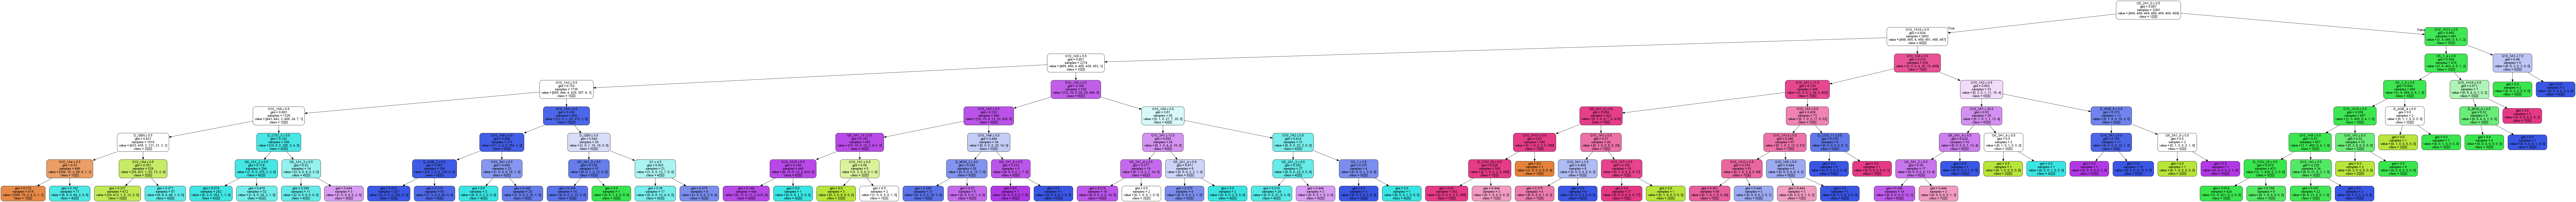

In [99]:
Image(graph.create_png())

In [106]:
xgb = XGBClassifier(random_state=123)

xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [107]:
y_pr = xgb.predict(x_ts)

In [164]:
accuracy_score(y_ts, y_pr)

0.9092261904761905

In [166]:
from sklearn.metrics import f1_score
f1_score(y_ts, y_pr, average='macro')

0.8880692493338292

In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_ts, y_pred) # decision tree

array([[ 516,   46,    0,   18,    9,    8,    7],
       [  49,  874,    6,   50,   16,   29,   15],
       [   7,   10, 1104,    1,   10,    0,    2],
       [   3,    6,    0,  313,   11,   10,    2],
       [   7,    5,    3,   15,  425,    3,   19],
       [   2,    4,    0,    3,    6,  199,    0],
       [   0,    1,    1,    0,    2,    2,  213]], dtype=int64)

In [119]:
confusion_matrix(y_ts, y_pr) # xgb

array([[ 534,   29,    0,   17,    9,    8,    7],
       [  42,  872,    7,   50,   22,   31,   15],
       [   3,    5, 1117,    1,    5,    0,    3],
       [   4,    5,    0,  311,   15,    7,    3],
       [   3,    1,    5,   15,  425,    4,   24],
       [   1,    3,    0,    4,   11,  195,    0],
       [   0,    1,    3,    0,    1,    2,  212]], dtype=int64)

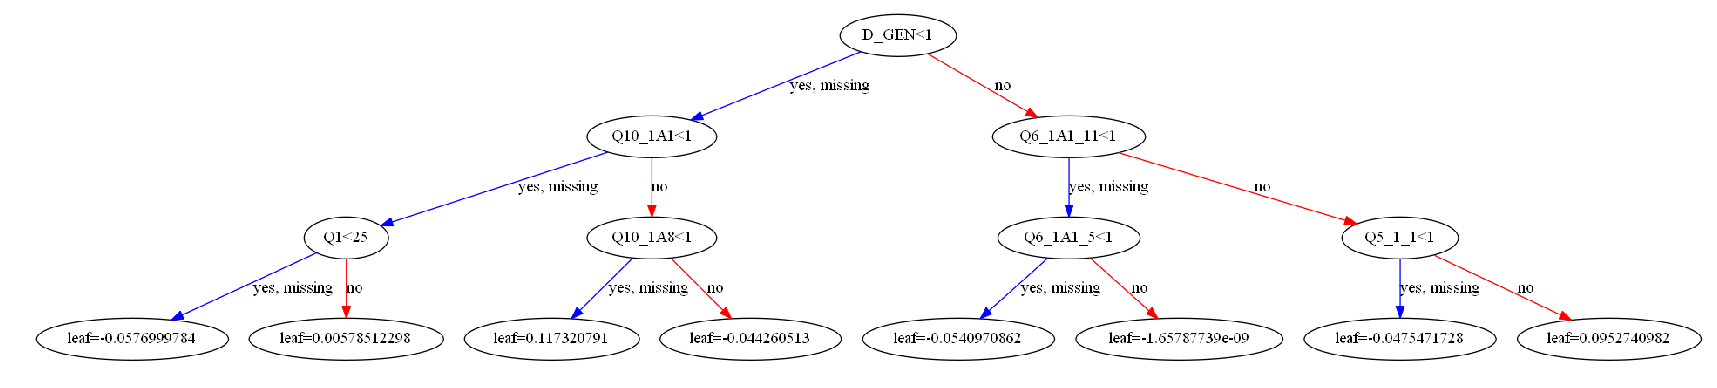

In [89]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, ax=ax)
#plt.savefig("temp5.pdf")

In [103]:
Series(feature_importance, index=x_tr.columns).sort_values(ascending=False)[0:20]

Q10_3A1     2305
Q1          1277
Q2_1         991
D_GEN        818
Q10_1A1      655
Q10_1A2      569
Q6_3A1_1     546
Q10_1A8      492
Q6_1A1_1     478
Q5_1_1       437
Q6_1A1_6     399
D_AGE_3      394
Q10_1A9      383
Q10_1A16     372
Q5_2A1_4     367
D_AGE_2      366
D_COU_2      362
Q10_1A4      360
Q6_3A1_2     348
Q5_2A1_1     320
dtype: int32

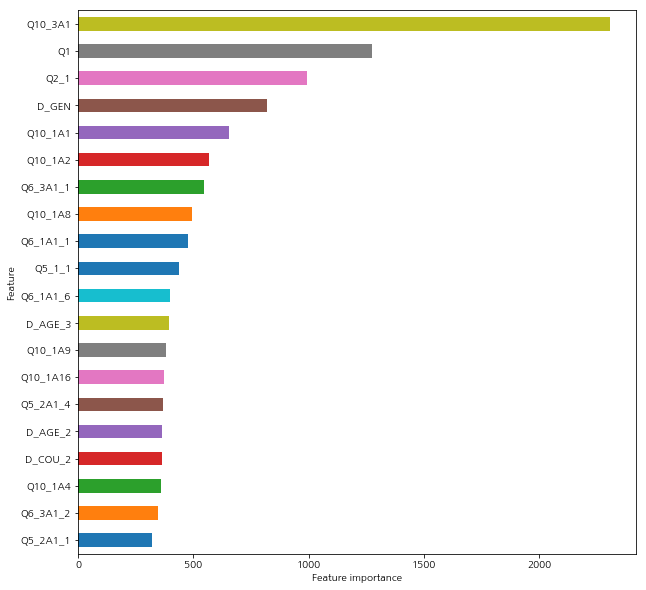

In [114]:
import seaborn as sns
from pandas import Series

feature_importance = lgbm.feature_importances_
Series_feat_imp = Series(feature_importance, index=x_tr.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize=(10, 10))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [110]:
def plot_feature_importances(clf, x_tr, y_tr=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(x_tr.values, y_tr.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(x_tr.values, y_tr.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = x_tr.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

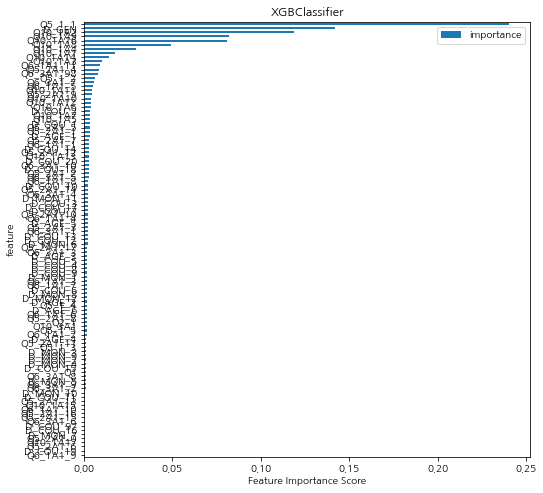

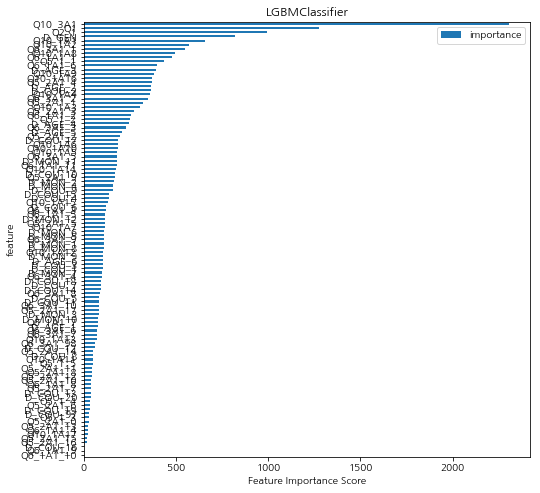

In [113]:
clfs = [XGBClassifier(),LGBMClassifier()]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf, x_tr, y_tr, top_n=x_tr.shape[1], title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)

In [116]:
lgbm.plot.importance(feature_importance, top_n = 10, measure = "Gain", left_margin = 10, cex = NULL)

AttributeError: 'LGBMClassifier' object has no attribute 'plot'

In [119]:
lgbm.plot_importance(lgbm, max_num_features=10)

AttributeError: 'LGBMClassifier' object has no attribute 'plot_importance'

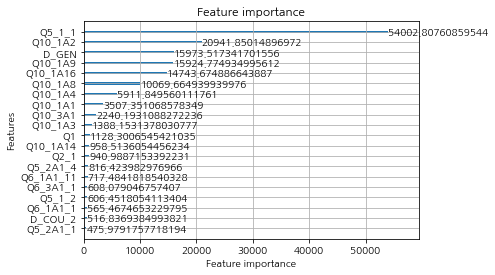

In [125]:
import lightgbm as lgb
lgb.plot_importance(lgbm, importance_type='gain', max_num_features=20)

In [128]:
rg = pd.read_csv("data_out3.csv")

In [131]:
display(rg.head())
display(rg.shape)

,Unnamed: 0,SIDO_NM,SGNG_NM,관광지수,거리(km),음식점수,지하철역,기차역,지역축제,숙박업소,...,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,교통,쇼핑,음식,체험
0,0,강원도,횡성군,45,115.84,15,0,0,0,49,...,19,789702,1,0,0,52,227909.20650,3.404934e+05,1.939118e+05,229525.3808
1,1,강원도,화천군,63,136.32,8,0,0,0,54,...,11,0,0,0,0,52,56967.38356,6.662156e+04,6.424161e+04,187515.2381
2,2,전라남도,화순군,64,315.33,8,0,3,7,49,...,79,1658663,0,0,0,51,87885.97059,1.463078e+05,9.257316e+04,156763.6649
3,3,경기도,화성시,57,55.10,7,0,2,0,210,...,49,491001,0,0,0,45,826851.63940,1.730390e+06,1.929045e+06,374742.1496
4,4,강원도,홍천군,69,105.19,14,0,0,8,105,...,38,145882,0,0,0,52,202671.73650,4.052238e+05,2.736526e+05,636969.9800


(161, 24)

In [132]:
rg['관광지수'].mean()

64.85093167701864

In [144]:
m = rg[rg['관광지수'] >= rg['관광지수'].mean()]

In [146]:
m.columns

Index(['Unnamed: 0', 'SIDO_NM', 'SGNG_NM', '관광지수', '거리(km)', '음식점수', '지하철역',
       '기차역', '지역축제', '숙박업소', '관광예산', '해시태그', '2017_소비자물가지수', '자연휴양림', '문화재',
       '입장객수', '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '교통', '쇼핑', '음식', '체험'],
      dtype='object')

In [150]:
m.head()

,Unnamed: 0,SIDO_NM,SGNG_NM,관광지수,거리(km),음식점수,지하철역,기차역,지역축제,숙박업소,...,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,교통,쇼핑,음식,체험
4,4,강원도,홍천군,69,105.19,14,0,0,8,105,...,38,145882,0,0,0,52,202671.7365,4.052238e+05,2.736526e+05,6.369700e+05
13,13,경상북도,포항시,92,330.33,22,0,3,0,369,...,71,4792105,1,0,1,54,590534.9398,1.393704e+06,1.058086e+06,1.661520e+05
16,16,강원도,평창군,91,161.96,58,0,0,0,143,...,63,5118306,0,0,0,52,412701.9151,1.310180e+06,1.337548e+06,2.342879e+06
17,17,경기도,파주시,120,45.77,44,0,8,0,130,...,69,6349863,0,0,1,45,688828.0507,6.849222e+06,6.887599e+05,3.431413e+05
18,18,경상남도,통영시,95,380.95,252,0,0,0,219,...,63,6277792,0,0,0,38,225043.0140,5.027716e+05,2.476558e+05,2.175892e+05


In [151]:
m.drop('Unnamed: 0', axis = 1, inplace = True)

In [162]:
# 많은 곳 찾을 땐 ascending=False
m1 = m.sort_values(['음식점수'], ascending=False).head(10).SGNG_NM
m2 = m.sort_values(['음식'], ascending=False).head(10).SGNG_NM
m3 = m.sort_values(['체험'], ascending=False).head(10).SGNG_NM
m4 = m.sort_values(['지역축제'], ascending=False).head(10).SGNG_NM
m5 = m.sort_values(['해시태그'], ascending=False).head(10).SGNG_NM
# 적은 곳 찾을 땐 ascending=True
#m6 = m.sort_values(['거리(km)'], ascending=True).head(15).SGNG_NM

In [163]:
result = pd.concat([m1,m2,m3,m4,m5], axis=0).value_counts().head(10).reset_index()
result.rename(columns={'index': 'SGNG_NM', 'SGNG_NM': 'value'}, inplace=True)
pd.merge(m.iloc[:,0:2], result, on='SGNG_NM').sort_values('value',ascending=False)

,SIDO_NM,SGNG_NM,value
2,경상남도,창원시,4
3,제주특별자치도,제주시,3
4,인천광역시,인천광역시,3
5,울산광역시,울산광역시,3
7,대구광역시,대구광역시,3
8,전라북도,군산시,3
0,강원도,홍천군,2
1,강원도,평창군,2
6,제주특별자치도,서귀포시,2
9,경상남도,거제시,2


In [164]:
# 많은 곳 찾을 땐 ascending=False
m11 = m.sort_values(['쇼핑장소개수'], ascending=False).head(10).SGNG_NM
m22 = m.sort_values(['면세점개수'], ascending=False).head(10).SGNG_NM
m33 = m.sort_values(['음식'], ascending=False).head(10).SGNG_NM
m44 = m.sort_values(['교통'], ascending=False).head(10).SGNG_NM
m55 = m.sort_values(['쇼핑'], ascending=False).head(10).SGNG_NM
# 적은 곳 찾을 땐 ascending=True
#m6 = m.sort_values(['거리(km)'], ascending=True).head(15).SGNG_NM

In [165]:
result = pd.concat([m11,m22,m33,m44,m55], axis=0).value_counts().head(10).reset_index()
result.rename(columns={'index': 'SGNG_NM', 'SGNG_NM': 'value'}, inplace=True)
pd.merge(m.iloc[:,0:2], result, on='SGNG_NM').sort_values('value',ascending=False)

,SIDO_NM,SGNG_NM,value
3,인천광역시,인천광역시,5
1,경상남도,창원시,4
2,제주특별자치도,제주시,4
4,제주특별자치도,서귀포시,4
5,부산광역시,부산광역시,4
7,전라북도,군산시,4
8,경기도,고양시,4
6,대구광역시,대구광역시,3
0,경기도,파주시,2
9,경상남도,거제시,2
